#Part 1 Data Preprocessing
#Importing Libraries

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Importing Training Dataset

In [29]:
dataset_train=pd.read_csv("Google_Stock_Price_Train.csv")
training_set=dataset_train.iloc[:,1:2].values

#Feature Scaling (Standardization/ Normalization)

In [30]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)
print(training_set_scaled)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


#Creating a data structure with 60 timestamps and 1 output

In [31]:
X_train=[]
y_train=[]
for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)

print("X_Train Data",X_train)
print("y_train Date",y_train)

X_Train Data [[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]
y_train Date [0.08627874 0.08471612 0.07454052 ... 0.95725128 0.93796041 0.93688146]


#Reshaping the data (Adding Dimensions)

X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

#Part 2- Building the RNN

In [32]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

#Initalising the RNN

In [33]:
regressor=Sequential()

#Adding the first LSTM layer and some Dropout Regularization

In [34]:
#Layer-1
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
#Layer-2
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))
#Layer-3
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))
#Layer-4
regressor.add(LSTM(units=50,return_sequences=False))
regressor.add(Dropout(0.2))
              
#Adding the output layer
regressor.add(Dense(units=1))

#Compiling the RNN

In [35]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [36]:
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100

38/38 [==============================] - 9s 52ms/step - loss: 0.0289
Epoch 2/100
38/38 [==============================] - 2s 51ms/step - loss: 0.0062
Epoch 3/100
38/38 [==============================] - 2s 50ms/step - loss: 0.0062
Epoch 4/100
38/38 [==============================] - 2s 51ms/step - loss: 0.0053
Epoch 5/100
38/38 [==============================] - 2s 54ms/step - loss: 0.0053
Epoch 6/100
38/38 [==============================] - 2s 54ms/step - loss: 0.0050
Epoch 7/100
38/38 [==============================] - 3s 78ms/step - loss: 0.0046
Epoch 8/100
38/38 [==============================] - 4s 93ms/step - loss: 0.0048
Epoch 9/100
38/38 [==============================] - 3s 88ms/step - loss: 0.0042
Epoch 10/100
38/38 [==============================] - 3s 78ms/step - loss: 0.0054
Epoch 11/100
38/38 [==============================] - 3s 74ms/step - loss: 0.0046
Epoch 12/100
38/38 [==============================] - 3s 74ms/step - loss: 0.0041
Epoch 13/100
38/38 [====

#Part-3 Making the Predictions and Visualizing the results

In [37]:
#Getting the real stock price of 2017
dataset_test=pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price=dataset_test.iloc[:,1:2].values

#Getting the Predicted stock price of 2017
dataset_total=pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)

X_test=[]
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])

X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

predicted_stock_price=regressor.predict(X_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


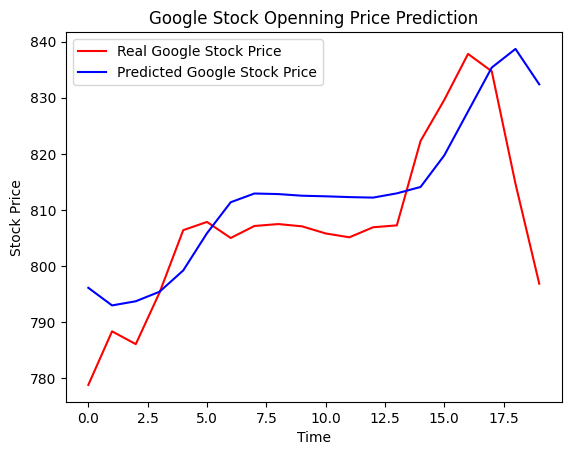

In [38]:
#Visualizing the Results
plt.plot(real_stock_price,color='red',label='Real Google Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Google Stock Price')
plt.title('Google Stock Openning Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()